In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import doralite
import gfdl_utils.core as gu
import CM4Xutils

In [3]:
model = "CM4Xp125"
exp = "historical"

In [4]:
def get_pp(model, exp):
    return doralite.dora_metadata(CM4Xutils.exp_dict[model][exp])['pathPP']

def open_CM4X(model, exp, ppname, time, add, **kwargs):
    pp = get_pp(model, exp)
    out = "ts"
    local = gu.get_local(pp, ppname, out)
    return gu.open_frompp(pp, ppname, out, local, time, add, **kwargs)

In [5]:
get_pp("CM4Xp25", "historical")

'/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/'

In [6]:
pi = open_CM4X("CM4Xp125", "piControl", "ocean_monthly", "*", "tos", dmget=True)
hi = open_CM4X("CM4Xp125", "historical", "ocean_monthly", "*", "tos", dmget=True)
si = open_CM4X("CM4Xp125", "ssp585", "ocean_monthly", "*", "tos", dmget=True)

Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.


In [7]:
fo = CM4Xutils.concat_scenarios([hi, si])

In [8]:
pi_u, fo_u = CM4Xutils.align_dates(pi, fo)

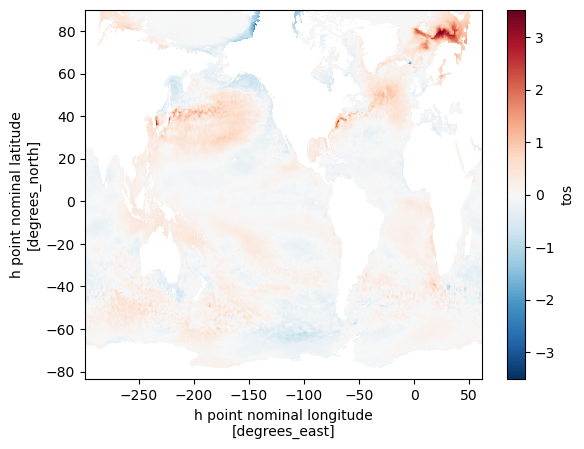

In [9]:
(fo_u.tos - pi_u.tos).sel(time=slice("1850", "1855")).mean("time").plot()